In [1]:
import pandas as pd
import glob
import os

In [2]:
df = pd.read_csv(r"C:\Users\barto\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Output\all_data.csv")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [3]:
todos_dados = pd.read_csv(r"C:\Users\barto\OneDrive\Documentos\todos_dados.csv")
todos_dados.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
todos_dados = todos_dados.dropna(how='all')
todos_dados.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [8]:
todos_dados = todos_dados[todos_dados['Order Date'].str[0:2] != 'Or']

In [10]:
todos_dados['Month'] = todos_dados['Order Date'].str[0:2]
todos_dados['Month'] = todos_dados['Month'].astype('int32')

todos_dados.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [12]:
todos_dados['Quantity Ordered'] = pd.to_numeric(todos_dados['Quantity Ordered'], errors='coerce')
todos_dados['Price Each'] = pd.to_numeric(todos_dados['Price Each'], errors='coerce')

todos_dados.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [13]:
todos_dados['Sales'] = todos_dados['Quantity Ordered'] * todos_dados['Price Each']

todos_dados.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [16]:
def get_city(address):
    if not isinstance(address, str):
        return 'Unknown'
    parts = address.split(',')
    if len(parts) > 1:
        return parts[1].strip()
    else:
        return 'Unknown'

def get_state(address):
    if not isinstance(address, str):
        return 'Unknown'
    parts = address.split(',')
    if len(parts) > 2:
        state_parts = parts[2].strip().split(' ')
        if len(state_parts) > 1:
            return state_parts[1]
        else:
            return 'Unknown'
    else:
        return 'Unknown'

todos_dados['city'] = todos_dados['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

todos_dados.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (75001)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (02215)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (90001)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (90001)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (90001)


Analisando qual foi o melhor mes para vendas e quando se ganhou nele

In [14]:
resultados = todos_dados.groupby('Month').sum()
resultados

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
Month,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75
6,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.61,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",2577802.26
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13


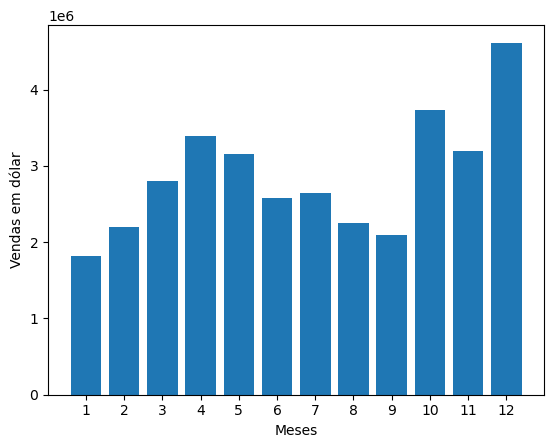

In [15]:
import matplotlib.pyplot as plt

meses = range(1,13)
plt.bar(meses, resultados['Sales'])
plt.xticks(meses)
plt.ylabel('Vendas em dólar')
plt.xlabel('Meses')
plt.show()

Qual cidade teve mais vendas?

In [17]:
resultados2 = todos_dados.groupby('city').sum()
resultados2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
city,,,,,,,,
Atlanta (30301),1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
Austin (73301),1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
Boston (02215),1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
Dallas (75001),1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
Los Angeles (90001),1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80
New York City (10001),1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43
Portland (04101),1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",17144,449758.27
Portland (97035),1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",70621,1870732.34
San Francisco (94016),1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91


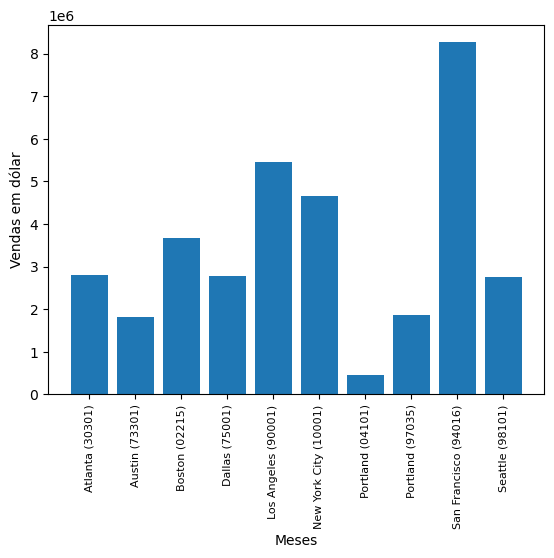

In [18]:
import matplotlib.pyplot as plt


cities = [city for city, df in todos_dados.groupby('city')]
plt.bar(cities, resultados2['Sales'])
plt.xticks(cities, rotation ='vertical', size=8)
plt.ylabel('Vendas em dólar')
plt.xlabel('Meses')
plt.show()

In [40]:
todos_dados['Order Date'] = pd.to_datetime(todos_dados['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

In [20]:
todos_dados['Hour'] = todos_dados['Order Date'].dt.hour
todos_dados['Minute'] = todos_dados['Order Date'].dt.minute
todos_dados.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (75001),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (02215),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (90001),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (90001),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (90001),9,27


Qual melhor horário para postar ánuncios com maior poder de compra?

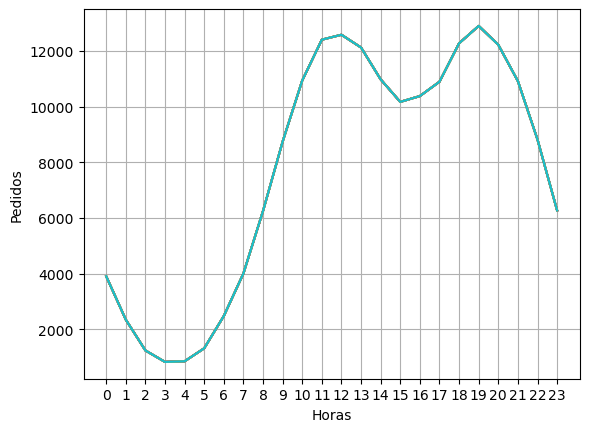

In [21]:
hours = [hour for hour, df in todos_dados.groupby('Hour')]
plt.plot(hours, todos_dados.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Horas')
plt.ylabel('Pedidos')
plt.grid()
plt.show()

Quais produtos mais estão sendo vendidos em conjuntos?

In [37]:
df = todos_dados[todos_dados['Order ID'].duplicated(keep=False)]

df_grouped = df.groupby('Order ID')['Product'].apply(lambda x: ','.join(x)).reset_index()

df_grouped.columns = ['Order ID', 'Grouped']
if 'Grouped' in todos_dados.columns:
  todos_dados = todos_dados.drop(columns=['Grouped'])
    
todos_dados = todos_dados.merge(df_grouped, on='Order ID', how='left')


todos_dados.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Minute,Grouped_x,Grouped_y,Grouped
0,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (90001),14,38,"Google Phone,Wired Headphones","Google Phone,Wired Headphones","Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (90001),14,38,"Google Phone,Wired Headphones","Google Phone,Wired Headphones","Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (90001),19,42,"Google Phone,USB-C Charging Cable","Google Phone,USB-C Charging Cable","Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (90001),19,42,"Google Phone,USB-C Charging Cable","Google Phone,USB-C Charging Cable","Google Phone,USB-C Charging Cable"
4,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (02215),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea...","Bose SoundSport Headphones,Bose SoundSport Hea...","Bose SoundSport Headphones,Bose SoundSport Hea..."
5,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (02215),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea...","Bose SoundSport Headphones,Bose SoundSport Hea...","Bose SoundSport Headphones,Bose SoundSport Hea..."
6,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (94016),17,0,"AAA Batteries (4-pack),Google Phone","AAA Batteries (4-pack),Google Phone","AAA Batteries (4-pack),Google Phone"
7,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (94016),17,0,"AAA Batteries (4-pack),Google Phone","AAA Batteries (4-pack),Google Phone","AAA Batteries (4-pack),Google Phone"
8,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (10001),11,7,"Lightning Charging Cable,USB-C Charging Cable","Lightning Charging Cable,USB-C Charging Cable","Lightning Charging Cable,USB-C Charging Cable"
9,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (10001),11,7,"Lightning Charging Cable,USB-C Charging Cable","Lightning Charging Cable,USB-C Charging Cable","Lightning Charging Cable,USB-C Charging Cable"


Qual produto vende mais e porque?

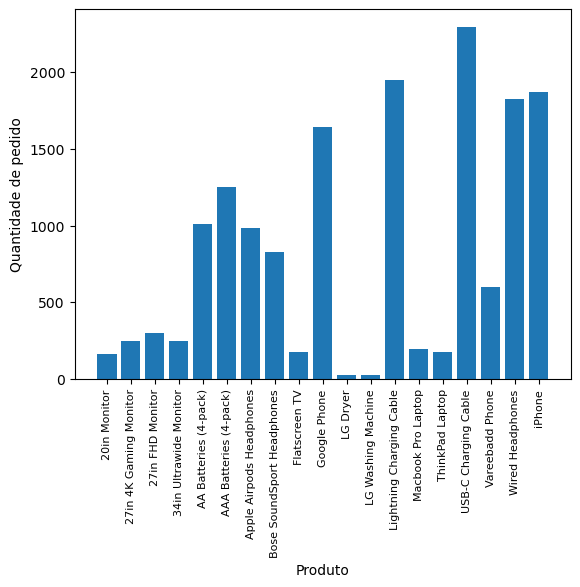

In [43]:
todos_dados['Order Date'] = pd.to_datetime(todos_dados['Order Date'], errors='coerce')

product_group = todos_dados.groupby('Product')

# Calcular a soma da coluna 'Quantity Ordered' para cada grupo de produto
quantity_order = product_group['Quantity Ordered'].sum()

products = [product for product, df in product_group ]

plt.bar(products, quantity_order)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Produto')
plt.ylabel('Quantidade de pedido')
plt.show()

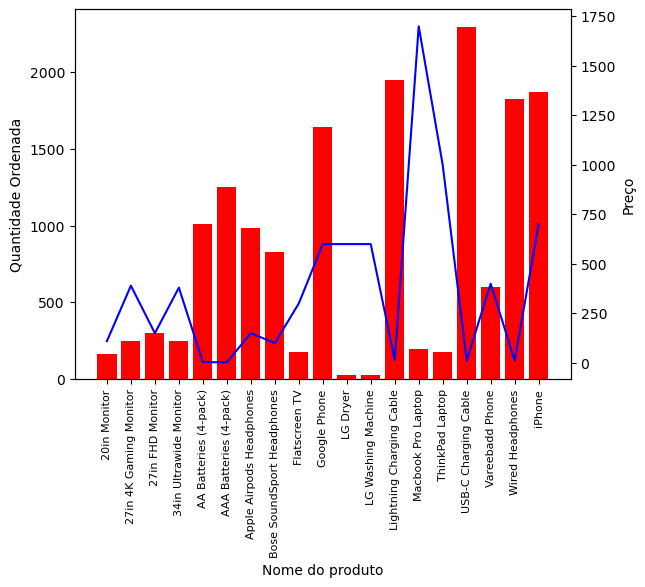

In [60]:
prices = todos_dados.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_order, color='Red')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Nome do produto')
ax1.set_ylabel('Quantidade Ordenada')
ax2.set_ylabel('Preço')
ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()